# 1. Loading Data:
Load the movie metadata from the `movies.dat` file and ratings from `ratings.dat`.
- Both files use '::' as the delimiter.
- The files have no header.
- The encoding for both files is ISO-8859-1.

In [1]:
# loading the dataset
import pandas as pd
import numpy as np

ratings = pd.read_csv("ratings.dat",sep="::",engine = "python",names=['UserID', 'MovieID', 'Rating', 'Timestamp'])
movies = pd.read_csv("movies.dat", sep="::", engine="python", encoding="ISO-8859-1", names=["MovieID", "Title", "Genres"])



In [13]:
print(ratings.head())
print(ratings.columns)
print(ratings.shape)

   UserID  MovieID  Rating           Timestamp
0       1     1193       5 2000-12-31 22:12:40
1       1      661       3 2000-12-31 22:35:09
2       1      914       3 2000-12-31 22:32:48
3       1     3408       4 2000-12-31 22:04:35
4       1     2355       5 2001-01-06 23:38:11
Index(['UserID', 'MovieID', 'Rating', 'Timestamp'], dtype='object')
(1000209, 4)


In [14]:
print(movies.head())
print(movies["MovieID"].shape)

   MovieID                               Title                        Genres
0        1                    Toy Story (1995)   Animation|Children's|Comedy
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
2        3             Grumpier Old Men (1995)                Comedy|Romance
3        4            Waiting to Exhale (1995)                  Comedy|Drama
4        5  Father of the Bride Part II (1995)                        Comedy
(3883,)


In [4]:
ratings["Timestamp"] =  pd.to_datetime(ratings["Timestamp"],unit="s")
print(ratings["Timestamp"].head())

0   2000-12-31 22:12:40
1   2000-12-31 22:35:09
2   2000-12-31 22:32:48
3   2000-12-31 22:04:35
4   2001-01-06 23:38:11
Name: Timestamp, dtype: datetime64[ns]


# 2. Building User-Item Interaction Matrix and Learning Latent Factors:
## 2.1. Building User-Item Interaction Matrix:
Use the ratings data to build a [sparse matrix](https://docs.scipy.org/doc/scipy/tutorial/sparse.html) where rows represent users and columns represent movies, with ratings as values.

In [5]:
# building matrix 
matrix = ratings.pivot(index ="UserID",columns = "MovieID", values = "Rating")
print(matrix.head())

MovieID  1     2     3     4     5     6     7     8     9     10    ...  \
UserID                                                               ...   
1         5.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
2         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
3         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
4         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
5         NaN   NaN   NaN   NaN   NaN   2.0   NaN   NaN   NaN   NaN  ...   

MovieID  3943  3944  3945  3946  3947  3948  3949  3950  3951  3952  
UserID                                                               
1         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
3         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
5         NaN   NaN   NaN   NaN   NaN   NaN   N

In [6]:
matrix.fillna("0", inplace=True )
print(matrix.head())

MovieID 1    2    3    4    5    6    7    8    9    10    ... 3943 3944 3945  \
UserID                                                     ...                  
1        5.0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
2          0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
3          0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
4          0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
5          0    0    0    0    0  2.0    0    0    0    0  ...    0    0    0   

MovieID 3946 3947 3948 3949 3950 3951 3952  
UserID                                      
1          0    0    0    0    0    0    0  
2          0    0    0    0    0    0    0  
3          0    0    0    0    0    0    0  
4          0    0    0    0    0    0    0  
5          0    0    0    0    0    0    0  

[5 rows x 3706 columns]


## 2.2. Learning Latent Factors:
Choose an algorithm (e.g., [SVD](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html), [NMF](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html)) to learn latent factors for movies.
Fit the chosen model to the user-item interaction matrix to obtain the latent factors.

In [18]:
# Learning latent Fcators wiht SVD
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components = 6, random_state =42)

U = svd.fit_transform(matrix.T)
V= svd.components_

print(f" user latent factors : {U} ")
print(f"item latent factors :{V}")
print(U.shape)

 user latent factors : [[132.78437278 -14.05834246 -17.34024595   2.5263772   55.50666553
    7.5526667 ]
 [ 44.57339924 -20.00104981   5.8571038  -16.10629237   4.25676795
   -2.16891728]
 [ 26.06163233 -11.21404522  -7.22721954 -14.06359663   2.59569739
    2.33154029]
 ...
 [  4.95124437   1.25834966  -1.0250882    0.18946402  -2.34443793
   -1.50471558]
 [  2.20815915   1.52066034  -2.02402129   0.57460943  -0.38576173
   -1.10843404]
 [ 25.09750908   3.371455   -12.85250883   6.6110669   -7.0738033
   -0.84876033]] 
item latent factors :[[ 0.00471786  0.00928856  0.00501018 ...  0.00138885  0.00700793
   0.01896102]
 [ 0.00164536 -0.00269762 -0.00334285 ...  0.00181343  0.01876482
   0.04080245]
 [-0.00267138 -0.00038186  0.0033437  ...  0.00011879  0.01071228
   0.00304318]
 [-0.00136795  0.00709149  0.00303388 ... -0.00055703 -0.00858309
   0.01862129]
 [ 0.01872518 -0.00675825  0.01176322 ...  0.00488482  0.02198239
  -0.00311904]
 [ 0.00868923  0.03073881  0.0052589  ...  0.00

## 2.3. Exploring Latent Space and Plotting Movies:
Utilize [t-SNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) (t-Distributed Stochastic Neighbor Embedding) to reduce the dimensionality of the learned latent factors and visualize them in a 2D plot.
Label the movies with their genres.

In [19]:
# Ploting latent factors by reducing the size of latent factors
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt 

tsne = TSNE(n_components = 2 , random_state =42)
data_2D = tsne.fit_transform(U)

print (f"dimention of latent factors : {data_2D.shape}")

C:\Users\HP\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


dimention of latent factors : (3706, 2)


In [27]:
movie_2d = pd.DataFrame(data_2D, columns=["x","y"])
movie_2d['MovieID'] = matrix.columns
movie_2d = movie_2d.merge(movies[['MovieID', 'Title', 'Genres']], on='MovieID')

print(movie_2d.head())

           x          y  MovieID                               Title  \
0 -12.219648 -75.433418        1                    Toy Story (1995)   
1  11.405880 -59.559464        2                      Jumanji (1995)   
2  26.006193 -34.627975        3             Grumpier Old Men (1995)   
3  27.992964 -16.772343        4            Waiting to Exhale (1995)   
4  31.224691 -27.774487        5  Father of the Bride Part II (1995)   

                         Genres  
0   Animation|Children's|Comedy  
1  Adventure|Children's|Fantasy  
2                Comedy|Romance  
3                  Comedy|Drama  
4                        Comedy  


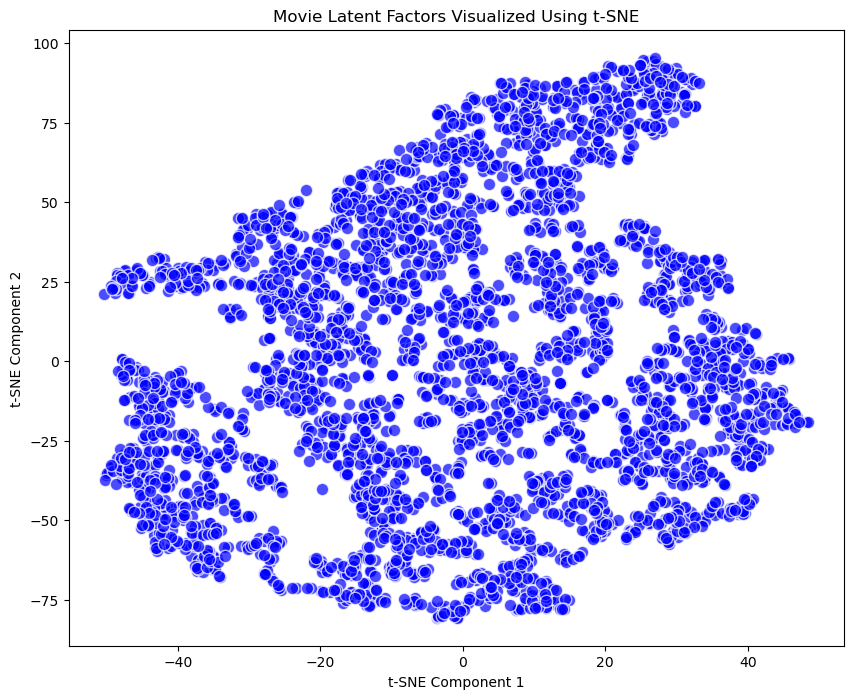

In [33]:
plt.figure(figsize = (10,8))
plt.scatter(movie_2d["x"],movie_2d["y"], c='blue', marker='o', alpha=0.7,edgecolors='w', s=80)
    
plt.title("Movie Latent Factors Visualized Using t-SNE")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()

## 2.4. Drawing Insights from the Plot:
Analyze the clustering of movies in the latent space.
Observe if movies of similar genres are grouped together.

Here , as you can see above plot, movies similar genres are grouped and visible in the graph

# 3. Building a Recommendation System:
## 3.1. Using Latent Factors:
Utilize the learned latent factors to build a recommendation system.
Employ a similarity measure (e.g., cosine similarity) to find similar movies based on latent factors. You can use the sklearn [nearest neighbors](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html) implementation.


In [44]:
# ...
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors

cosine_sim = cosine_similarity(data_2D)

print(cosine_sim)

[[ 0.99999994  0.93943757  0.6932921  ... -0.43087378 -0.6958183
   0.9580527 ]
 [ 0.93943757  1.          0.89828813 ... -0.7140537  -0.89982545
   0.80180997]
 [ 0.6932921   0.89828813  1.         ... -0.9490508  -0.9999938
   0.457676  ]
 ...
 [-0.43087378 -0.7140537  -0.9490508  ...  1.          0.94793844
  -0.15417565]
 [-0.6958183  -0.89982545 -0.9999938  ...  0.94793844  1.
  -0.4607951 ]
 [ 0.9580527   0.80180997  0.457676   ... -0.15417565 -0.4607951
   1.        ]]


In [54]:
same = cosine_sim[0]

# Sort the similarity 
sort = np.argsort(same)[::-1]

# Get the top 5 recommended movies 
rec_movie = sort[1:6]
indice = sort[0]
print(movies.iloc[indice]["Title"])
print("here is the reccomended movies")

for idx in rec_movie:
    print(movies.iloc[idx]["Title"])


Toy Story (1995)
here is the reccomended movies
Corrina, Corrina (1994)
Peggy Sue Got Married (1986)
Wonder Boys (2000)
Bowfinger (1999)
Bride of Re-Animator (1990)


In [59]:
neighbors = NearestNeighbors(n_neighbors=6, metric='cosine', algorithm='brute')  
neighbors.fit(data_2D)
distances, indices = neighbors.kneighbors(data_2D[0].reshape(1, -1))

movie_titles = movies['Title']  

# Get the movie titles for the top 5 similar movies
recommended_movies = movie_titles.iloc[indices.flatten()]

print(recommended_movies)

0                   Toy Story (1995)
347          Corrina, Corrina (1994)
2400    Peggy Sue Got Married (1986)
3248              Wonder Boys (2000)
2701                Bowfinger (1999)
2944     Bride of Re-Animator (1990)
Name: Title, dtype: object


## 3.2. Recommending Movies:
Recommend 5 movies for some selected movies (e.g., "Star Wars: Episode IV - A New Hope (1977)", "Lion King, The (1994)").

In [61]:
movie_id = movies.loc[movies["Title"] == "Lion King, The (1994)","MovieID"].values
print(movie_id)

[364]


In [62]:
neighbors = NearestNeighbors(n_neighbors=6, metric='cosine', algorithm='brute')  
neighbors.fit(data_2D)
distances, indices = neighbors.kneighbors(data_2D[movie_id].reshape(1, -1))

movie_titles = movies['Title']  

# Get the movie titles for the top 5 similar movies
recommended_movies = movie_titles.iloc[indices.flatten()]

print(recommended_movies)

364                     Maverick (1994)
755                         Jack (1996)
3468          Where the Money Is (2000)
1291          Santa with Muscles (1996)
3615    Fabulous Baker Boys, The (1989)
1290                       Hype! (1996)
Name: Title, dtype: object
